In [9]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
names=['animal name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
dataset=pandas.read_csv(url,names=names)
print(dataset.shape)


(101, 18)


In [3]:
print(dataset.head(20))

   animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0     aardvark     1         0     0     1         0        0         1   
1     antelope     1         0     0     1         0        0         0   
2         bass     0         0     1     0         0        1         1   
3         bear     1         0     0     1         0        0         1   
4         boar     1         0     0     1         0        0         1   
5      buffalo     1         0     0     1         0        0         0   
6         calf     1         0     0     1         0        0         0   
7         carp     0         0     1     0         0        1         0   
8      catfish     0         0     1     0         0        1         1   
9         cavy     1         0     0     1         0        0         0   
10     cheetah     1         0     0     1         0        0         1   
11     chicken     0         1     1     0         1        0         0   
12        chub     0     

In [4]:
print(dataset.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

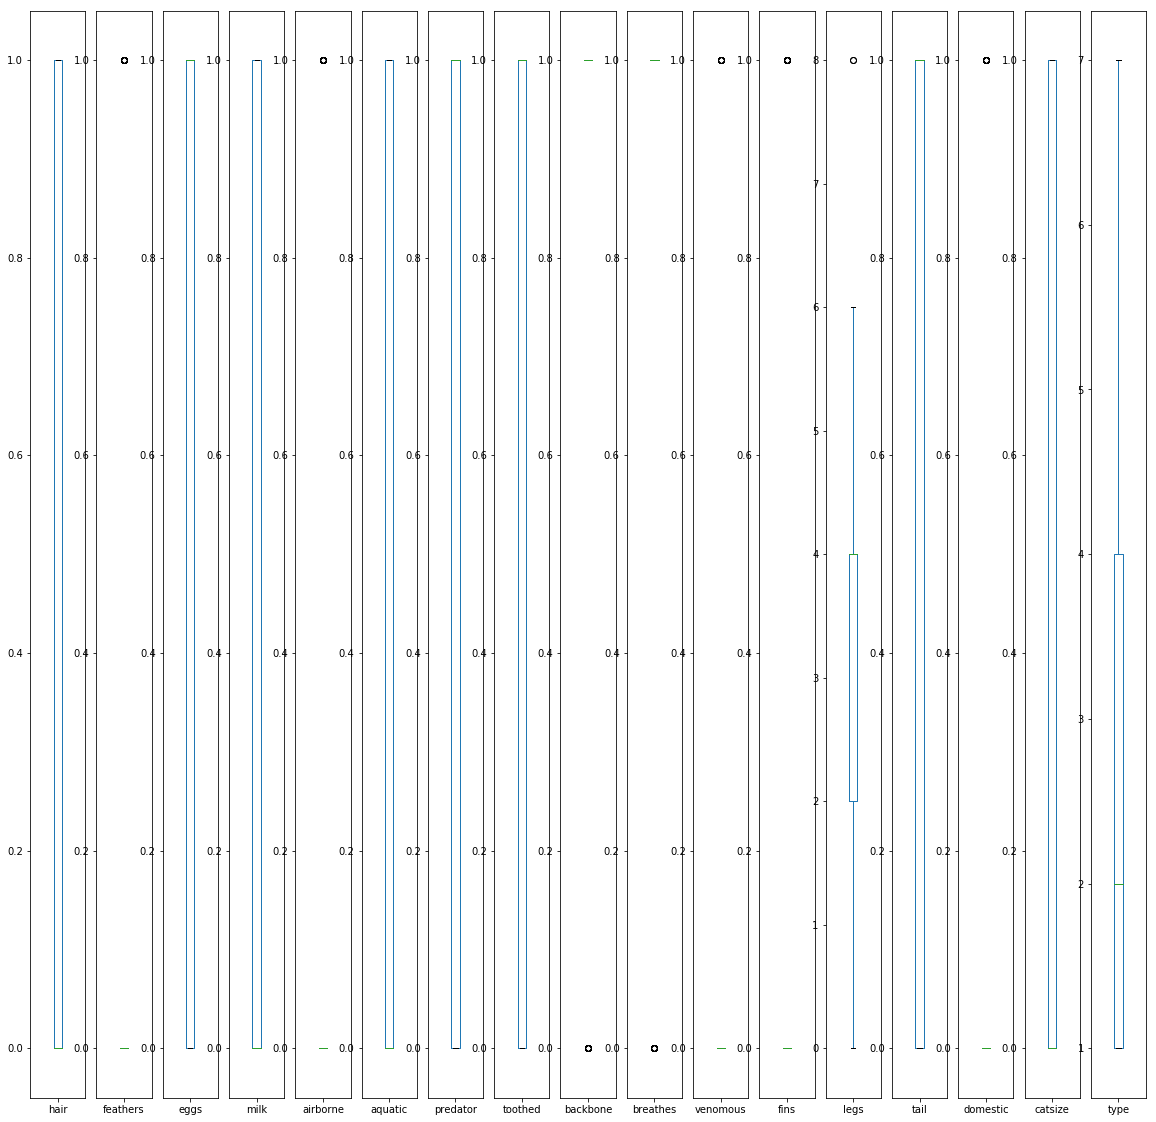

In [43]:
dataset.plot(kind='box',subplots=True, sharex=False, sharey=False)
plt.show()

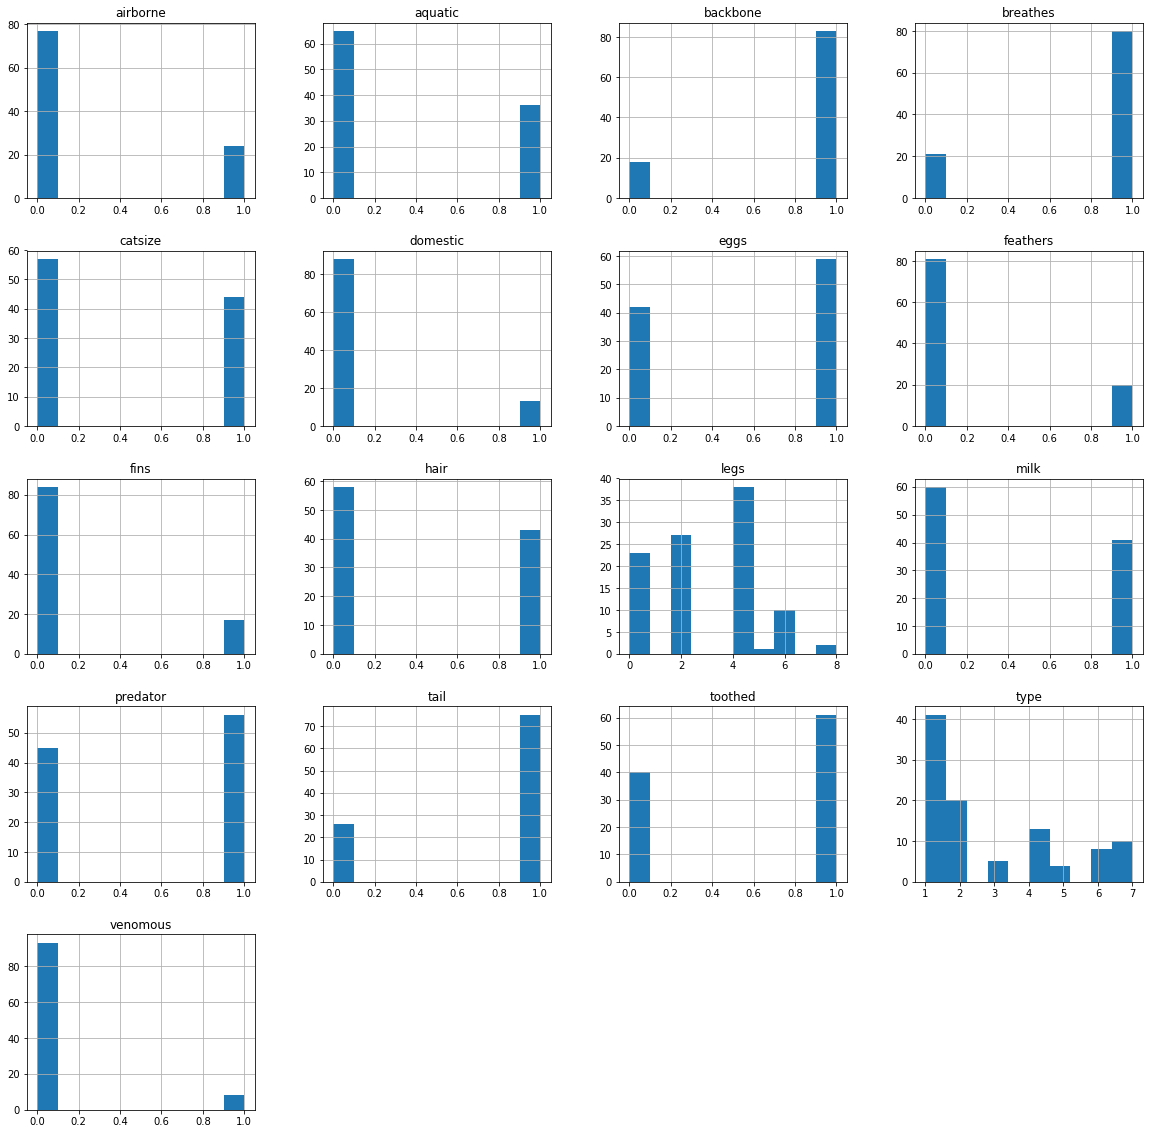

In [44]:
dataset.hist()
plt.show()

In [41]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

Current size: [12.0, 9.0]


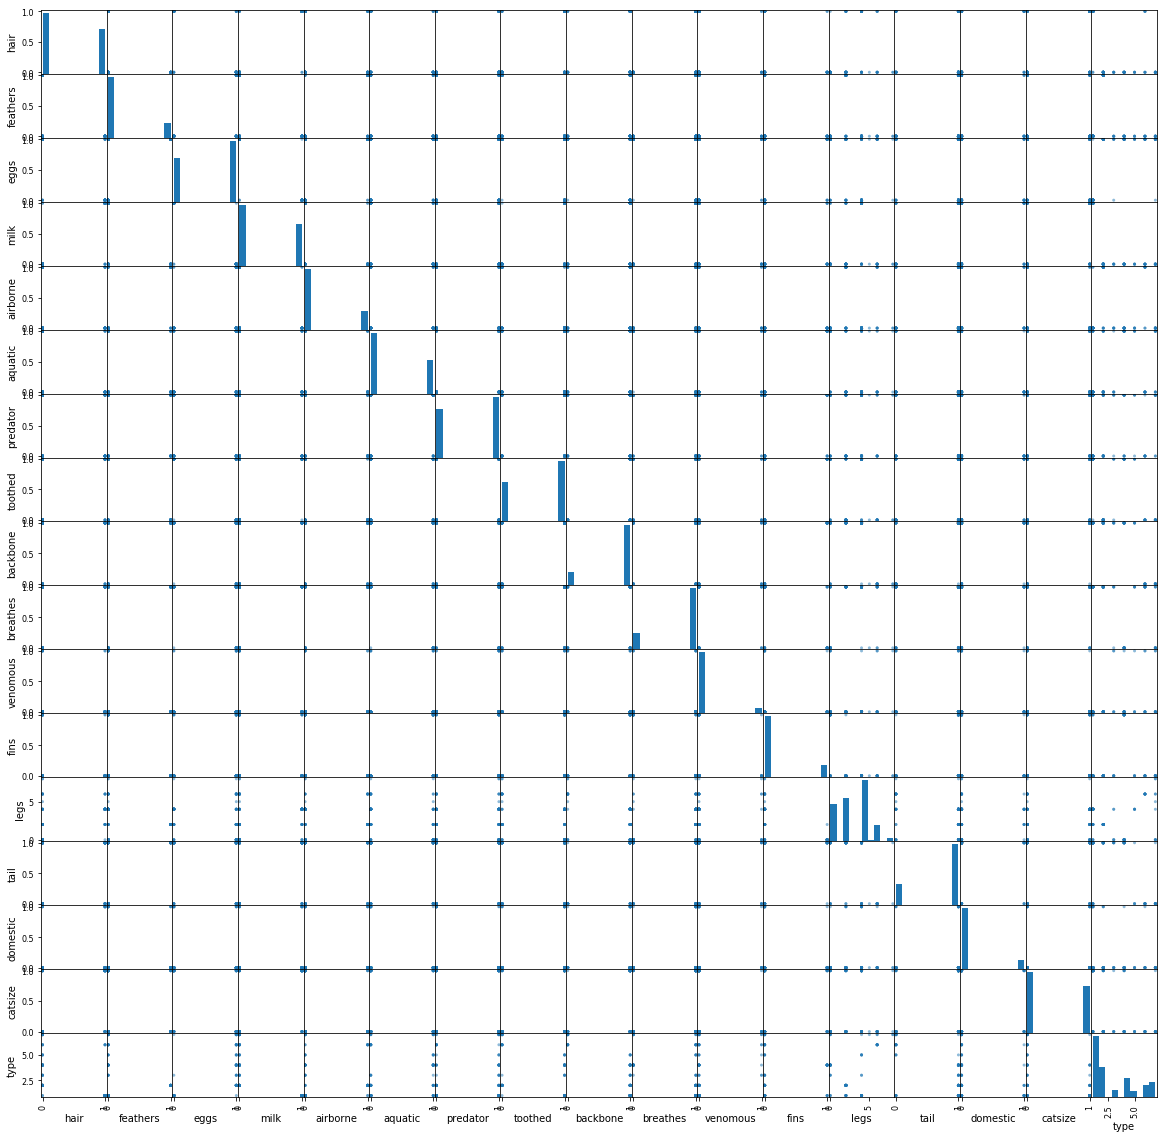

In [42]:
scatter_matrix(dataset)
plt.show()

In [19]:
dataset1=dataset.loc[:,'hair':]
dataset1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [20]:
array=dataset1.values
X=array[:,1:16]
Y=array[:,16]
seed=7
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=0.30,random_state=seed)

In [21]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.828571 (0.139971)


C:\Users\NOOR\xx\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\NOOR\xx\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\NOOR\xx\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.900000 (0.065465)
KNN: 0.800000 (0.145686)
CART: 0.971429 (0.057143)
NB: 0.914286 (0.094761)
SVM: 0.785714 (0.115175)


C:\Users\NOOR\xx\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\NOOR\xx\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\NOOR\xx\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\NOOR\xx\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\NOOR\xx\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\NOOR\xx\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\NOOR\xx\Anaconda3\lib\site-packages\s

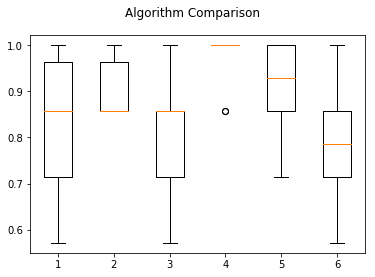

In [34]:
p=plt.figure()
p.suptitle('Algorithm Comparison')
ax=p.add_subplot(111)
plt.boxplot(results)
#ax.set_xtickslabels(names)
plt.show()

In [37]:
cart=DecisionTreeClassifier()
cart.fit(X_train,Y_train)
predictions=cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.967741935484
[[12  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  3]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        12
          2       1.00      1.00      1.00         5
          3       0.00      0.00      0.00         0
          4       1.00      1.00      1.00         4
          5       1.00      0.50      0.67         2
          6       1.00      1.00      1.00         5
          7       1.00      1.00      1.00         3

avg / total       1.00      0.97      0.98        31



C:\Users\NOOR\xx\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
